In [1]:
import uproot
import numpy as np
import pandas as pd
from vis_functions import *
from timestamp_calc import *
from collect_data import *

In [2]:
path = "/data/48PMT/bipo/20230113/"

### Summary:

In [3]:
with open(f'{path}run0/summary.txt', 'r') as f:
    print(f.read())

Fri Jan 13 10:33:25 UTC 2023
Test3: stability test for BiPo
ADC tested: high gain
Runtime: 600 s
Number of GCUs tested:  (see GCU_connected.txt)
Channel tested: 0 1 2



### Setup settings:

In [4]:
with open(f'{path}run0/setup_settings_bipo.json', 'r') as f:
    print(f.read())

{
  "threshold" : { "fixed_value" : false, "th_value" : 10000,
                  "auto_value" : true, "n_sigmas" : 25},
  "pretrigger" : 60,
  "trigger_window" : 40,
  "trg_source" : { "external_trg" : 0,
                   "bec_validated" : 1},
  "ddr3_enable" : false,
  "firmware_version" : "0024"
}



In [9]:
paths = [f'{path}run{i}/tier1_integration/output_dt2.root' for i in [0]]
print("Paths: ")
[print("  ", el) for el in paths]

total_charges = join_by_run(paths, ['total_charge'])
source_names = ['Bipo']
plot_distrs_one_param(total_charges, 'total_charge', source_names,
                      file_name='total_charge_bkg_nth5_bipo', Nbins=np.linspace(0, 100e-6, 100))

Paths: 
   /data/48PMT/bipo/20230113/run0/tier1_integration/output_dt2.root


In [11]:
file = uproot.open(f'{path}run{0}/tier1_integration/output_dt2.root')
timestamp = np.array(file['eventTree']['timestamp'].array()) * 8e-9
charge = np.array(file['eventTree']['total_charge'].array())

In [25]:
charge.shape, timestamp.shape

((7514400,), (7514400, 48))

In [40]:
mask = np.logical_and(charge>0, charge<90e-6)
diffs = np.diff(timestamp[:,0][mask])
diffs=diffs[diffs>0.]

501.08125112920465

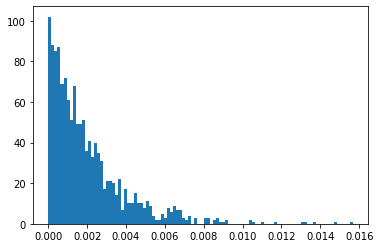

In [41]:
import matplotlib.pyplot as plt
plt.hist(diffs, bins = 100)

res = expon.fit(diffs)
rate = 1 / res[1]
rate

521.3238060919164

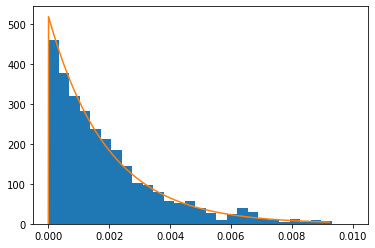

In [58]:
import matplotlib.pyplot as plt
cut = 1000e-5
to_fit = diffs[diffs<cut]
plt.hist(to_fit, bins = np.linspace(0, cut, 30), density = True)

res = expon.fit(to_fit)
x = np.linspace(0, to_fit.max(), 1000)
plt.plot(x, expon.pdf(x, *res))
rate = 1 / res[1]
rate

## Join by runs [7-11] + [13]: total charge. Multiplicity threshold = 8

run7 - Na22 bare, 10', n_th 8 \
run8 - background, 10', n_th 8 \
run9 - Mn54 bare, 10', n_th 8 \
run10 - Cs137 bare, 10', n_th 8 \
run11 - Cs137 aluminum shield, 10', n_th 8 \
run13 - background, 10', n_th 8

Paths: 
   /data/48PMT/calib/20221207/run7/tier1/output_dt2.root
   /data/48PMT/calib/20221207/run8/tier1/output_dt2.root
   /data/48PMT/calib/20221207/run9/tier1/output_dt2.root
   /data/48PMT/calib/20221207/run10/tier1/output_dt2.root
   /data/48PMT/calib/20221207/run11/tier1/output_dt2.root
   /data/48PMT/calib/20221207/run13/tier1/output_dt2.root


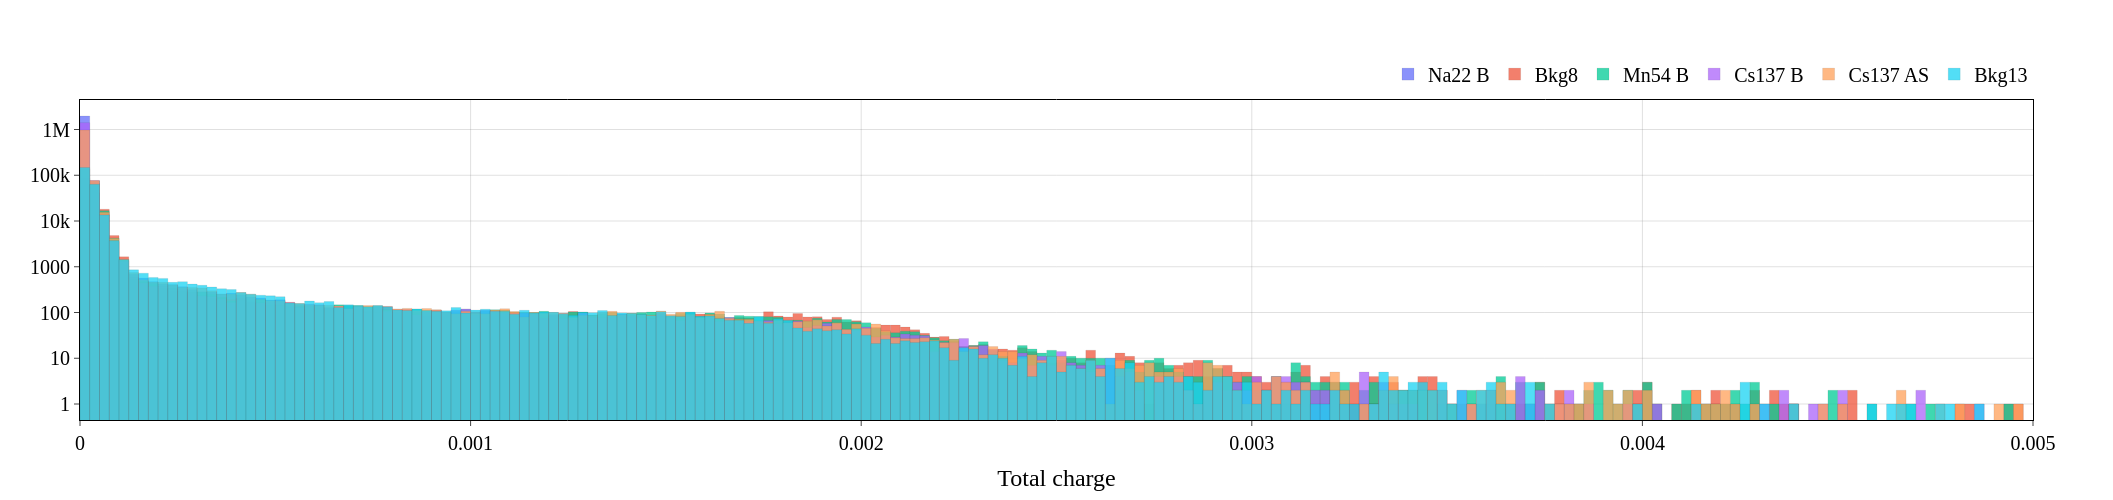

In [8]:
paths = [f'{path}run{i}/tier1/output_dt2.root' for i in range(7, 12)]
paths += [f'{path}run13/tier1/output_dt2.root']
print("Paths: ")
[print("  ", el) for el in paths]

total_charges = join_by_run(paths, ['total_charge'])
source_names = ['Na22 B', 'Bkg8', 'Mn54 B', 'Cs137 B', 'Cs137 AS', 'Bkg13']

plot_distrs_one_param(total_charges, 'total_charge', source_names,
                      file_name='total_charge_bkg_nth8')

In [9]:
for i in range(1, 14):
    print(f"-_____________________run number {i}_____________________")
    timestamp_list = timestamp_calc(run_number=i, dir_name="tier1")
    print(timestamp_list)
    print(f"**************Number of channels: {len(timestamp_list)}")
    print("\n \n")

-_____________________run number 1_____________________
**************Channel with incorrect value: 21
**************Value: 1882600.9761335442
[5.86620743e+02 5.86620743e+02 5.86620743e+02 5.86620743e+02
 5.86620743e+02 5.86620743e+02 5.86620743e+02 5.86620743e+02
 5.86620743e+02 5.86620743e+02 5.86620743e+02 5.86620743e+02
 5.86620743e+02 5.86620743e+02 5.86620743e+02 5.86620743e+02
 5.86620743e+02 5.86620743e+02 5.86620743e+02 5.86620743e+02
 5.86620743e+02 1.47572070e+11 5.39401863e+02 5.39401863e+02]
**************Number of channels: 24

 

-_____________________run number 2_____________________
[591.61511779 591.64253398 591.62063011 591.64253398 591.65310678
 591.62063011 591.62763875 496.41963848 591.64267168 591.62763875
 591.64253398 591.62063011 591.64253398 591.65310678 591.61511779
 591.64253398 496.3892388  496.41963848 496.3892388  496.41963848
 591.65414747 324.53970672 324.53970672 324.53970672]
**************Number of channels: 24

 

-_____________________run number 3

## Join by runs [8, 10]: total charge. Multiplicity threshold = 8

In [10]:
paths = [f'{path}run{i}/tier1_integration/output_dt2.root' for i in [8, 10]]
print("Paths: ")
[print("  ", el) for el in paths]

charges = join_by_run(paths, ['charge'])
source_names = ['Bkg', 'Cs137 bare']

Paths: 
   /data/48PMT/calib/20221207/run8/tier1_integration/output_dt2.root
   /data/48PMT/calib/20221207/run10/tier1_integration/output_dt2.root


In [11]:
paths = [f'{path}run{i}/tier1_integration/output_dt2.root' for i in [8, 10]]
print("Paths: ")
[print("  ", el) for el in paths]

total_charges = join_by_run(paths, ['total_charge'])
source_names = ['Bkg', 'Cs137 bare']
colors = ['royalblue', 'darkred']

bkg_time = timestamp_calc(8, 'tier1_integration', left_shift=1000).mean()
cs_time = timestamp_calc(10, 'tier1_integration', left_shift=1000).mean()

scale_factor = cs_time / bkg_time

plot_distrs_one_param(total_charges, 'total_charge', source_names, colors_flag=True,
                      file_name='total_charge_nth8_Cs',
                      bkg_subtract=False, Nbins=np.linspace(0, 1e-4, 1000),
                      range_x=[0, 1e-4], line_width=0.0, opacity=0.7,
                      bkg_n=0, scale_factor=scale_factor, left_shift=1000, colors=colors)

Paths: 
   /data/48PMT/calib/20221207/run8/tier1_integration/output_dt2.root
   /data/48PMT/calib/20221207/run10/tier1_integration/output_dt2.root


In [12]:
paths = [f'{path}run{i}/tier1_integration/output_dt2.root' for i in [8, 9]]
print("Paths: ")
[print("  ", el) for el in paths]

total_charges = join_by_run(paths, ['total_charge'])
source_names = ['Bkg', 'Mn54 bare']
colors = ['royalblue', 'darkred']

bkg_time = np.median(timestamp_calc(8, 'tier1_integration', left_shift=1000))
cs_time = np.median(timestamp_calc(9, 'tier1_integration', left_shift=1000))

scale_factor = cs_time / bkg_time

plot_distrs_one_param(total_charges, 'total_charge', source_names, colors_flag=True,
                      file_name='total_charge_nth8_Mn',
                      bkg_subtract=False, Nbins=np.linspace(0, 1e-4, 1000),
                      range_x=[0, 1e-4], line_width=0.0, opacity=0.7,
                      bkg_n=0, scale_factor=scale_factor, left_shift=1000,
                      colors=colors)

Paths: 
   /data/48PMT/calib/20221207/run8/tier1_integration/output_dt2.root
   /data/48PMT/calib/20221207/run9/tier1_integration/output_dt2.root
**************Channel with incorrect value: 16
**************Value: 1890167.0116695922
**************Channel with incorrect value: 18
**************Value: 1890167.0116695922


Paths: 
   /data/48PMT/calib/20221207/run8/tier1_integration/output_dt2.root
   /data/48PMT/calib/20221207/run9/tier1_integration/output_dt2.root
**************Channel with incorrect value: 16
**************Value: 1890167.0116695922
**************Channel with incorrect value: 18
**************Value: 1890167.0116695922


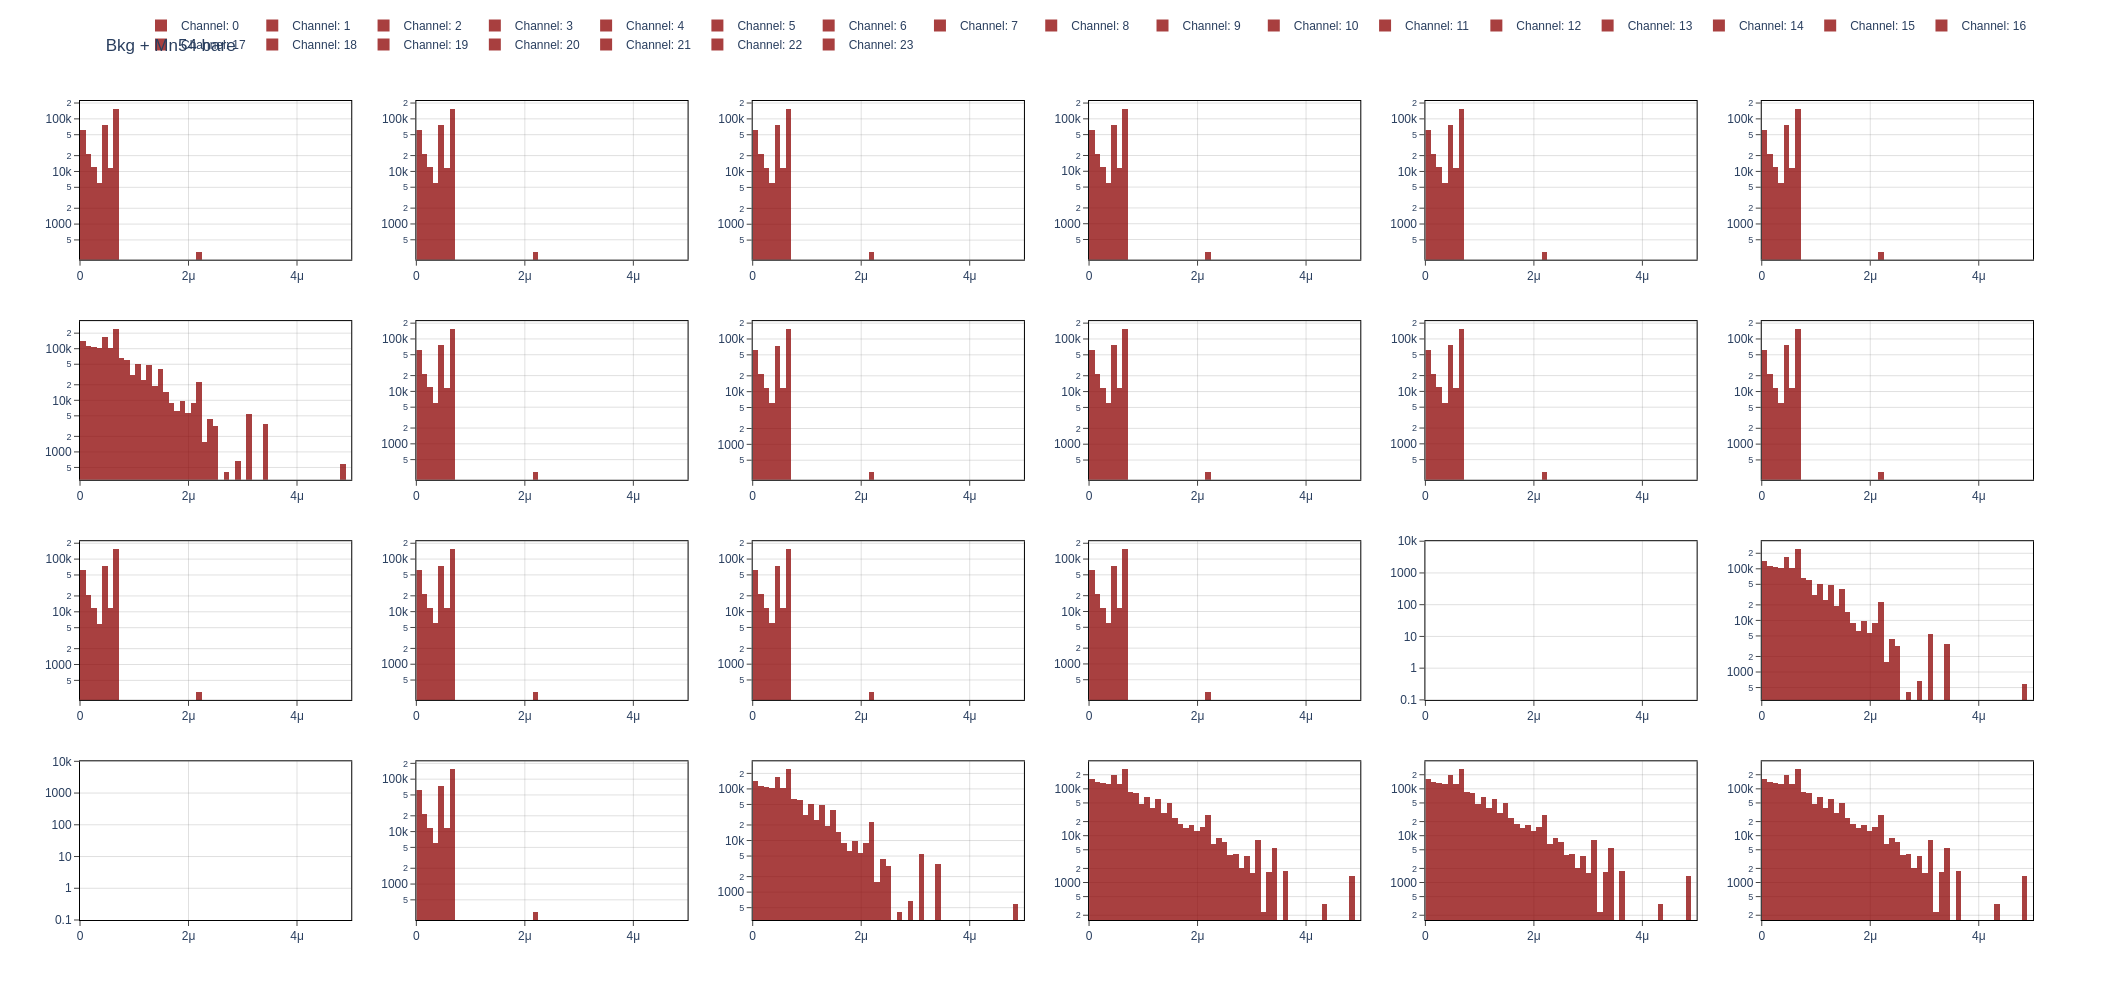

In [13]:
paths = [f'{path}run{i}/tier1_integration/output_dt2.root' for i in [8, 9]]
print("Paths: ")
[print("  ", el) for el in paths]

charges = join_by_run(paths, ['charge'])
source_names = ['Bkg', 'Mn54 bare']

bkg_time = timestamp_calc(8, 'tier1_integration', left_shift=1000)
cs_time = timestamp_calc(9, 'tier1_integration', left_shift=1000)
timestamps = [bkg_time, cs_time]

plot_charges_by_channels_src_and_bkg(charges, timestamps, source_names,
                                     Nbins=np.linspace(0, 5e-6, 50), bkg_subtract=True)

Paths: 
   /data/48PMT/calib/20221207/run8/tier1_integration/output_dt2.root
   /data/48PMT/calib/20221207/run10/tier1_integration/output_dt2.root


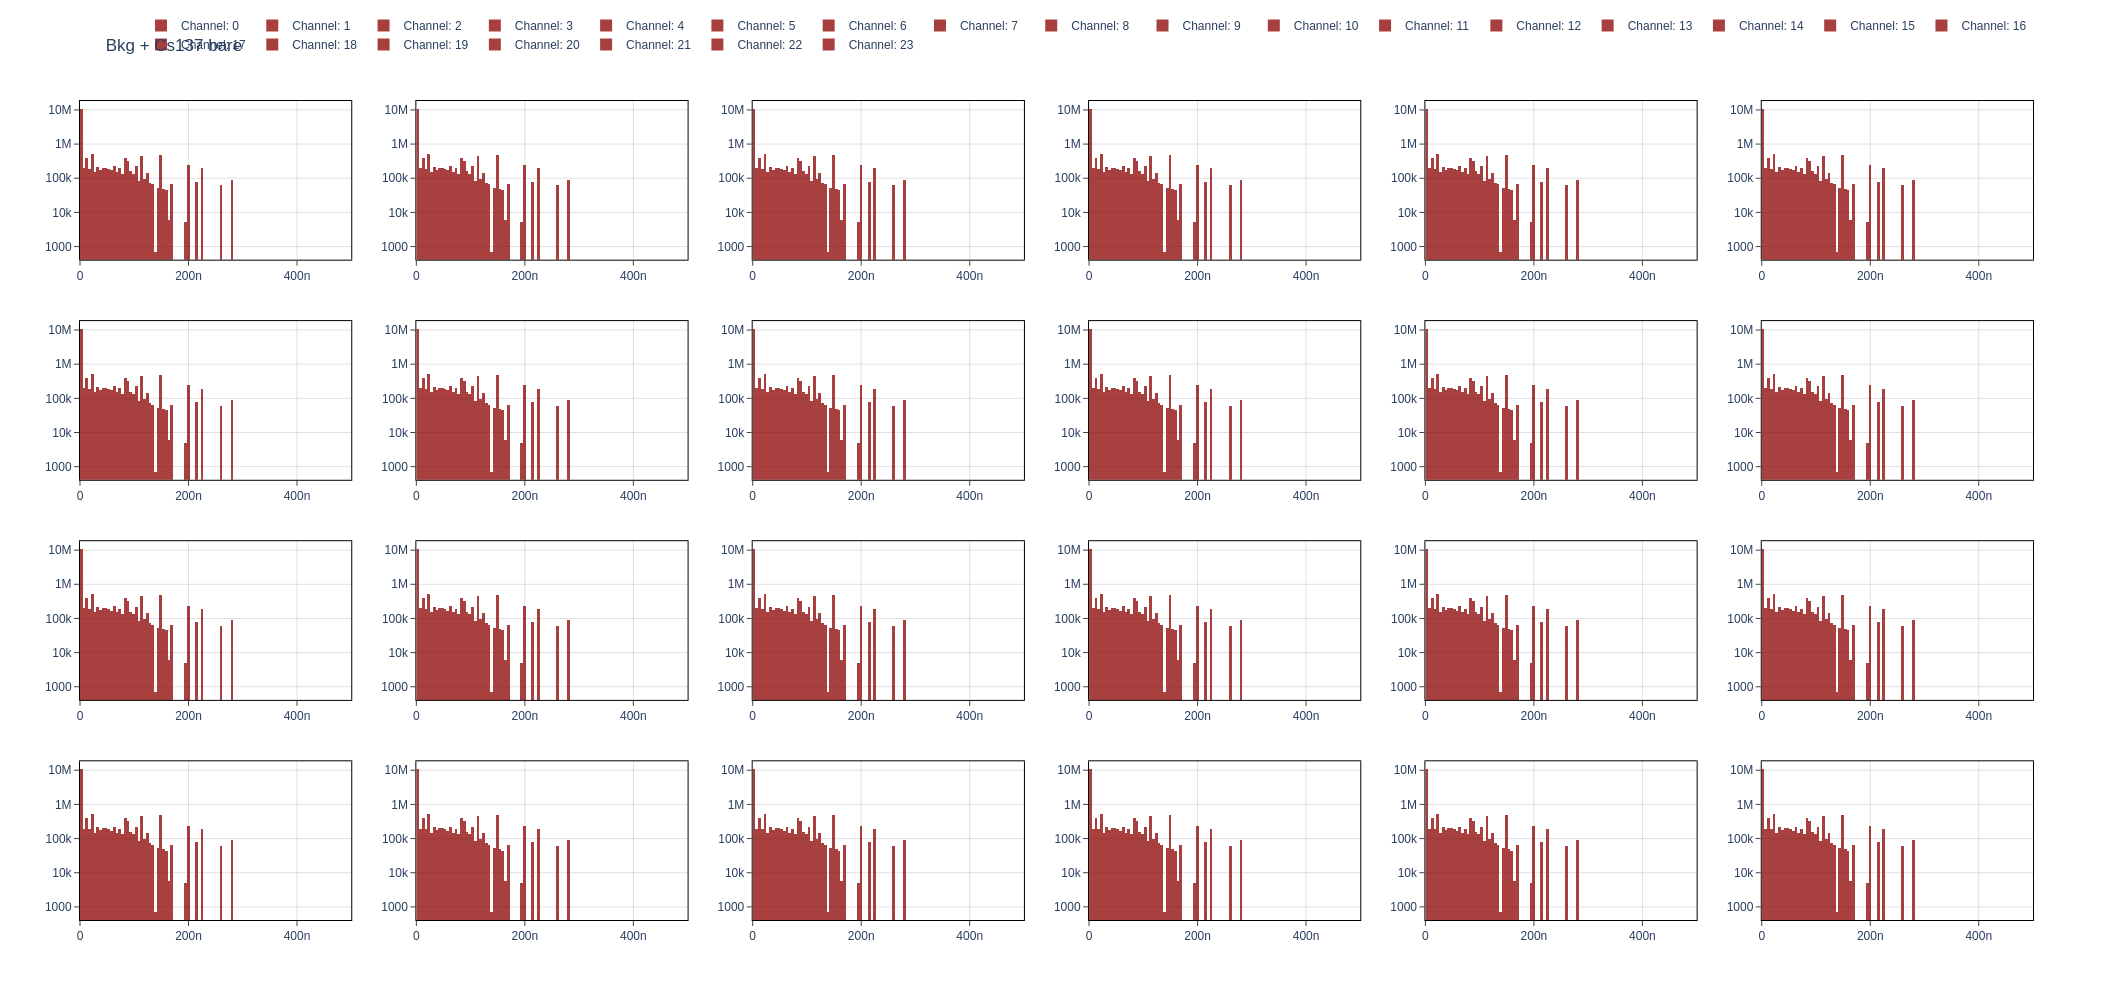

In [14]:
paths = [f'{path}run{i}/tier1_integration/output_dt2.root' for i in [8, 10]]
print("Paths: ")
[print("  ", el) for el in paths]

charges = join_by_run(paths, ['charge'])
source_names = ['Bkg', 'Сs137 bare']

bkg_time = timestamp_calc(8, 'tier1_integration', left_shift=1000)
cs_time = timestamp_calc(10, 'tier1_integration', left_shift=1000)
timestamps = [bkg_time, cs_time]

plot_charges_by_channels_src_and_bkg(charges, timestamps, source_names,
                                     Nbins=np.linspace(0, 5e-7, 100),
                                     bkg_subtract=True)